# Projet R1

## Tristan Gallet Ahmed Mahmoudi

## 1. Exercice d'échauffement

    Partie1 avec qu'une seule urne:

In [12]:
une_partie1=function(){
  #initialisation
  tour=c(urne=5,choix=NA,piece=NA,ntour=0) 
partie=rbind(tour) 
#tours 
while(tour[1]!=0){ 
tour[4]=tour[4]+1 
choix=1 #dans chaque tour on choisit pile 
tour[2]=choix 
piece=sample(1:2, size=1) #codes: 1=pile, 2=face 
tour[3]=piece 
if(choix==piece){ 
  tour[1]=tour[1]-1 
}
partie=rbind(partie,tour) 
} 
return(partie) 
} 

Durée moyenne sur 100 parties

In [13]:
n=100
res=replicate(n,une_partie1())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
mean(duree)

[1] 9.83

### 1.1.2 - 
Partie2 avec deux urnes, on choisira de d'abord vider une urne puis l'autre

In [3]:
une_partie2=function(){
  #initialisation
  tour=c(urne1=5,urne2=5,choix=NA,piece=NA,ntour=0) 
partie2=rbind(tour)
#tours 
while(tour["urne1"]!=0 | tour["urne2"] !=0){ 
tour["ntour"]=tour["ntour"]+1
choix=1
if(tour["urne1"]==0) choix=2 #si l'urne 1 est vide on prend face
if(tour["urne2"]==0) choix=1 #si l'urne 2 est vide on prend pile
tour["choix"]=choix 
piece=sample(1:2,size=1) #codes: 1=pile, 2=face 
tour["piece"]=piece 
if(choix==piece & choix==1) tour["urne1"]=tour["urne1"]-1 
if(choix==piece & choix==2) tour["urne2"]=tour["urne2"]-1
partie2=rbind(partie2,tour) 
} 
return(partie2) 
}

Durée de 100 parties:

In [4]:
n=200
res=replicate(n,une_partie2())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
mean(duree)

[1] 19.95

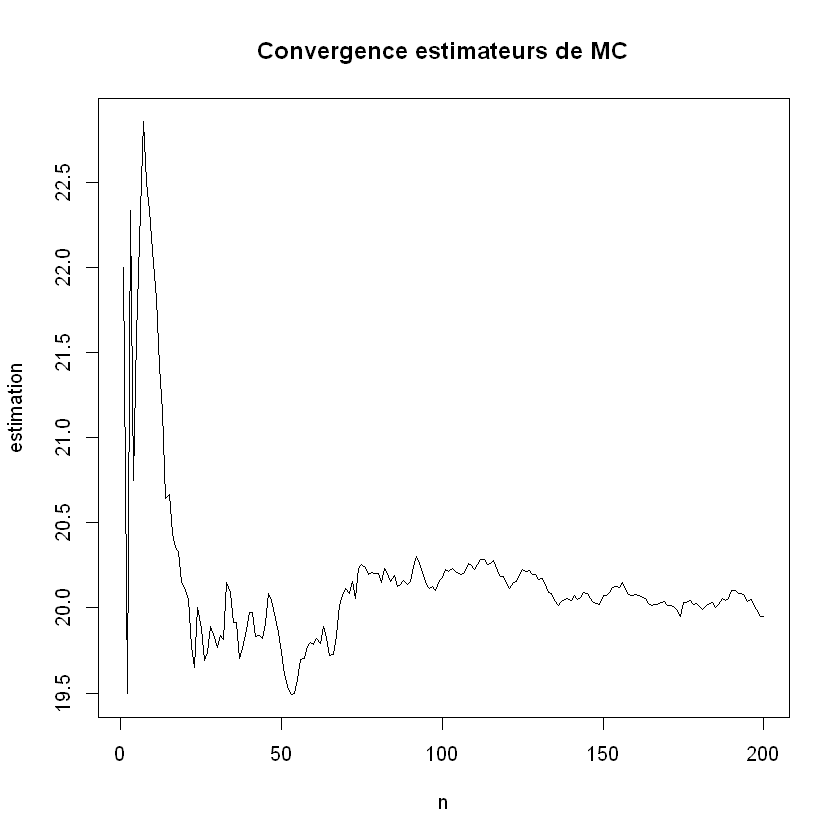

In [18]:
plot(cumsum(duree)/(1:n),type='l',main='Convergence estimateurs de MC',xlab='n',ylab='estimation')

On voit que pour n=200, n est assez grand pour que l'estimation converge.

Écart-type de 200 parties:

In [19]:
n=100
res=replicate(n,une_partie2())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
sd(duree)

[1] 4.466203

## 1.3

### 4. Partie3 avec choix de boule minimal

In [3]:
choisirBouleMax = function(urne1,urne2){
    if(urne1 > urne2){
        return(1)
    } else {
        return(2)
    }
}

choisirBouleMin = function(urne1,urne2){
    if(urne1 < urne2 & urne1 != 0) return(1)
    if(urne1 == 0) return(2)
    if(urne2 <= urne1 & urne2 != 0) return(2)
    if(urne2 == 0) return(1)
}

In [7]:
une_partie3=function(){
  #initialisation
  tour = c(urne1=5, urne2=5, choix=NA, piece=NA, ntour=0) 
partie3 = rbind(tour)
#tours 
while(tour["urne1"] != 0 | tour["urne2"] != 0){ 
tour["ntour"] = tour["ntour"] + 1
choix = choisirBouleMax(tour["urne1"],tour["urne2"])
tour["choix"] = choix 
piece=sample(1:2,size=1) #codes: 1=pile, 2=face 
tour["piece"] = piece 
if(choix == piece & choix==1) tour["urne1"] = tour["urne1"]-1
if(choix != piece & choix==1) tour["urne1"] = 5 
if(choix == piece & choix==2) tour["urne2"] = tour["urne2"]-1
if(choix != piece & choix==2) tour["urne2"] = 5
partie3=rbind(partie3, tour) 
} 
return(partie3) 
}

### 5.Moyenne et écart-type avec méthode de Monte-Carlo:

In [8]:
n=1
res=replicate(n,une_partie3())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
cat("Moyenne:", round(mean(duree), 2))
cat("\nÉcart-type:", round(sd(duree), 2))

Moyenne: 125.29
Écart-type: 81.06

### 6.Comparaison avec nombre minimal de boule:

In [4]:
une_partie32=function(){
  #initialisation
  tour = c(urne1=5, urne2=5, choix=NA, piece=NA, ntour=0) 
partie32 = rbind(tour)
#tours 
while(tour["urne1"] != 0 | tour["urne2"] != 0){ 
tour["ntour"] = tour["ntour"] + 1
choix = choisirBouleMin(tour["urne1"],tour["urne2"])
tour["choix"] = choix 
piece=sample(1:2,size=1) #codes: 1=pile, 2=face 
tour["piece"] = piece 
if(choix == piece & choix==1) tour["urne1"] = tour["urne1"]-1
if(choix != piece & choix==1) tour["urne1"] = 5 
if(choix == piece & choix==2) tour["urne2"] = tour["urne2"]-1
if(choix != piece & choix==2) tour["urne2"] = 5
partie32=rbind(partie32, tour) 
}
return(partie32) 
}

In [10]:
n=1000
res=replicate(n,une_partie32())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
cat("Moyenne:", round(mean(duree), 2))

Moyenne: 129.48

On ne remarque pas de différence notable quand on choisit l'urne avec le nombre de boules minimal

## 2. Le jeu Chut, Coco!

### 8. Stratégie:

On choisira l'étable avec le moins d'animaux endormi pour réveiller le moins d'animaux en cas d'un cocoriqo de Coco. 
Ce cas est équivalent à prendre l'étable avec le plus d'animaux réveillé

In [3]:
reveilleMin = function(cochon = 0, vache = 0, chat = 0, mouton = 0){
    if(cochon >= vache & cochon >= chat & cochon >= mouton) return(1)
    if(vache >= chat & vache >= mouton) return(2)
    if(chat >= mouton) return(3)
    return(4)
}

### 9. Partie4:

In [6]:
une_partie4 = function(){
    #initialisation
    tour = c(cochon=3, vache=3, chat=3, mouton=3, choix=NA, des=NA, ntour=0, cartejour=4) 
    partie4 = rbind(tour)
    #tours 
    while((max(tour[1:4])) != 0 & tour["cartejour"] != 0){
        tour["ntour"] = tour["ntour"] + 1
        choix = reveilleMin(tour["cochon"], tour["vache"], tour["chat"], tour["mouton"])
        tour["choix"] = choix 
        des=sample(1:6,size=1) #dés à 6 faces
        if(des<5) tour[choix] = tour[choix]-1
        if(des==5) tour["cartejour"] = tour["cartejour"]-1
        if(des==6) tour[choix] = 3
        tour["des"] = des 
        partie4=rbind(partie4, tour) 
    } 
    return(partie4) 
}

In [49]:
n=1000
res=replicate(n,une_partie4())
duree=sapply(res,FUN=function(partie) nrow(partie)-1)
cat("Durée moyenne d'une partie:", round(mean(duree), 2))
cat("\nÉcart type d'une partie:", round(sd(duree), 2))

Durée moyenne d'une partie: 17.53
Écart type d'une partie: 4.96

In [75]:
n=1000
res=replicate(n,une_partie4())
victoir=sapply(res, FUN=function(partie) tail(partie[,8],1))
victoir = cumsum(victoir != 0)
winrate=victoir[n]/n
winrate=unname(winrate)
cat("Taux de victoire:", winrate)

Taux de victoire: 0.497